In [1]:
import numpy as np
import celmech as cm
import matplotlib.pyplot as plt
import sys
sys.path.append("../01_code/")
from perfect_oblate_spheroid import *

In [2]:
def transformation_matrix(u,v,e):
    ch = np.cosh(u)
    sh = np.sinh(u)
    c = np.cos(v)
    s = np.sin(v)
    denom = e * (np.cosh(2*u) - np.cos(2*v))
    T = np.array([
        [ch*s,c*sh],
        [c*sh,-ch*s]
    ])
    return 2*T/denom

Set up Hamiltonian

In [4]:
ecc = 0.5 # ellipticity of spheroids
u1,u2 = 0.8,1.2 # inner and outer turning points of orbit in u
dv = .1 # angular distance from midplane of vertical turning point

def G(tau,e):
    b_sq = 1 - e*e
    return np.sqrt(tau-b_sq) * np.arccos(np.sqrt(b_sq/tau))
    
def U(u,e):
    sh = np.sinh(u)
    lmbda = 1 + e*e*sh*sh
    return -1*G(lmbda,e)/e/e
    
def V(v,e):
    s = np.sin(v)
    mu = 1 - e*e*s*s
    return -1*G(mu,e)/e/e

uv_lims_to_ELI3(0.8,1.2,0.5*np.pi  + 0.2,0.7,U,V)

(-0.7510869978061187, 0.40565875200832907, 0.9508445041574337)

In [3]:
ecc = 0.5 # ellipticity of spheroids
u1,u2 = 0.8,1.2 # inner and outer turning points of orbit in u
dv = .1 # angular distance from midplane of vertical turning point
ham = get_POSP_hamiltonian(ecc,u1,u2,np.pi/2 + dv)
J_arr,Minv=uv_lims_to_actions_freqs(u1,u2,np.pi/2 + dv,ecc)

In [4]:
ham.integrate(1)
ham.state.t=0
ham.t

0

In [5]:
ham.H

                                                       ⎛      ________________
                           _______________________     ⎜     ╱             2  
                          ╱    2    2       2          ⎜    ╱         1 - e   
                        ╲╱  - e ⋅sin (v) + e  + ε ⋅acos⎜   ╱   ───────────────
                                                       ⎜  ╱       2    2      
           2                                           ⎝╲╱     - e ⋅sin (v) + 
          L                                                                   
───────────────────── + ──────────────────────────────────────────────────────
   2    2        2                                                       2    
2⋅e ⋅sin (v)⋅sinh (u)                                                   e ⋅sin

______⎞                                 ⎛         ________       ⎞            
      ⎟      ______________________     ⎜        ╱      2        ⎟            
      ⎟     ╱  2     2       2          ⎜      ╲╱  

In [ ]:
# def F(tau,e):
#     """
#     The functions appearing in the oblate perfect spheroid potential, which is
#     given by 

#     .. math::
#         \phi(\lambda,\mu) = -(F(\lambda) - F(\mu))/(\lambda - \mu)

#     Parameters
#     ---------- 
#     tau : float
#         coordinate symbol
#     e : float
#         eccentricity of oblate spheroids
#     """
#     bsq = 1-e*e
#     return np.sqrt(tau-bsq) * np.arccos(np.sqrt(bsq/tau))
# vv = np.linspace(0,0.5*np.pi)
# uu = np.linspace(0,3)

# mu = 1 - ecc**2 * np.sin(vv)**2
# lmbda = 1+ecc**2 * np.sinh(uu)**2
# # plt.plot(vv,-Gfn(np.cos(vv),ecc)-F(mu,ecc)/ecc/ecc)
# # plt.plot(vv,-Gfn(np.cosh(uu),ecc)-F(lmbda,ecc)/ecc/ecc)

# pot_lm = lambda l,m : -1 * (F(l,ecc) - F(m,ecc))/(l-m)
# pot_uv = lambda u,v : (Gfn(np.cosh(u),ecc) - Gfn(np.cos(v),ecc)) / (np.sinh(u)**2 + np.sin(v)**2)
# pot_lm(1 + ecc**2 * np.sinh(2)**2,1-ecc**2),pot_uv(2,np.pi/2)
# u,v = sp.symbols("u,v",real=True)
# LL,MM = 1 + ecc**2 * np.sinh(UU)**2,1-ecc**2 * np.sin(VV)**2
# arr1 = pot_uv(UU,VV)
# arr2 = pot_lm(LL,MM)

# u,v = sp.symbols("u,v",real=True)
# UU,VV = np.meshgrid(np.linspace(0,1),np.linspace(0,0.5*np.pi))
# arr1 = sp.lambdify((u,v),get_POS_potential_alt(0.5,u,v))(UU,VV)
# arr2 = sp.lambdify((u,v),get_POS_potential(0.5,u,v))(UU,VV)

set up polar coordinate Hamiltonian

In [6]:
R,L = sp.symbols("R,L",positive=True)
z,pR,pz = sp.symbols("z,p_R,p_z",real=True)
e = sp.symbols("e",positive = True)

Rsq_plus_zsq =(R**2 + z**2)
d = sp.sqrt(e**4 + 2 * e**2 *(R**2-z**2) + Rsq_plus_zsq**2)
lmbda = 1 - e*e/2 + Rsq_plus_zsq/2 + d/2
mu = 1 - e*e/2 + Rsq_plus_zsq/2 - d/2

T_Rz = (pR*pR + pz*pz + L*L/R/R)/2
u_of_Rz = sp.asinh(sp.sqrt((lmbda-1))/e)
v_of_Rz = sp.asin(sp.sqrt((1-mu))/e)
Phi_Rz = get_POS_potential(e,u_of_Rz,v_of_Rz)


HRz = T_Rz + Phi_Rz

u0,v0 = ham.state.values[:2]
R0 = ecc * np.sinh(u0) * np.sin(v0)
z0 = ecc * np.cosh(u0) * np.cos(v0)
pR0,pz0 = transformation_matrix(u0,v0,ecc) @ ham.state.values[2:]
state_Rz = cm.PhaseSpaceState([R,z,pR,pz],[R0,z0,pR0,pz0])
ham_Rz = cm.Hamiltonian(HRz,ham.H_params,state_Rz)

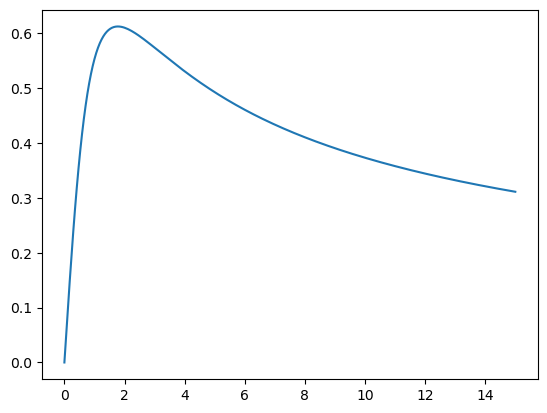

In [7]:
Phi_R_planar = sp.simplify(get_POS_potential(e,u_of_Rz.xreplace({z:0}),sp.pi/2))

vc_sq = sp.lambdify((R,e),R*sp.diff(Phi_R_planar,R))

plt.plot(np.linspace(0,15,256),np.sqrt(vc_sq(np.linspace(0,15,256),0.5)))

Numberical integration

In [ ]:
Nout = 256
state_soln = np.zeros((Nout,4))
state_Rz_soln = np.zeros((Nout,4))
times = np.linspace(0,20,Nout)

for i,t in enumerate(times):
    ham.integrate(t)
    ham_Rz.integrate(t)
    state_soln[i] = ham.state.values
    state_Rz_soln[i] = ham_Rz.state.values
Rarr = ecc * np.sinh(state_soln[:,0]) * np.sin(state_soln[:,1])
zarr = ecc * np.cosh(state_soln[:,0]) * np.cos(state_soln[:,1])
plt.plot(Rarr,zarr)
plt.plot(state_Rz_soln.T[0],state_Rz_soln.T[1])
plt.xlim(0,1)
plt.ylim(-2,2)

In [ ]:
plt.plot(times,Rarr)
plt.plot(times,state_Rz_soln[:,0])

In [ ]:
plt.plot(times,zarr)
plt.plot(times,state_Rz_soln[:,1])

In [22]:
OmegaR,Omegaz,Omegaphi = Minv[0]
print(OmegaR,Omegaz,Omegaphi)

1.2734021761520604 0.7522486697505693 0.6920409564029834


In [40]:
from celmech.miscellaneous import frequency_modified_fourier_transform

X = state_soln[:,1]-np.pi/2 + 1j*state_soln[:,3]
Y = state_soln[:,0] + 1j*state_soln[:,2]
Y-= np.mean(Y)

In [41]:
frequency_modified_fourier_transform(times,X,4)

{-0.7571191171001296: (0.048309589396302505+0.05186528801474124j),
 0.7868503230735199: (0.008503308599682773-0.021833862377760853j),
 -2.0265211381578854: (0.005239398041996503-0.003592488384686602j),
 2.034968313075202: (0.0019788925058785837+0.001056151198796569j)}

In [42]:
frequency_modified_fourier_transform(times,Y,4)

{-1.2734254419471844: (-0.034336230889306874+0.17141395070895726j),
 1.272772393657057: (-0.004026012086082474-0.020853241272029213j),
 -2.5479020749512435: (0.01755247309202841+0.007608706841200922j),
 2.5471588751082543: (0.004491956664029258-0.0018968059831568817j)}

## potential expansion

## Contour plots

In [24]:
R,L = sp.symbols("R,L",positive=True)
z,pR,pz = sp.symbols("z,p_R,p_z",real=True)
e = sp.symbols("e",positive = True)

Rsq_plus_zsq =(R**2 + z**2)
d = sp.sqrt(e**4 + 2 * e**2 *(R**2-z**2) + Rsq_plus_zsq**2)
lmbda = 1 - e*e/2 + Rsq_plus_zsq/2 + d/2
mu = 1 - e*e/2 + Rsq_plus_zsq/2 - d/2

T_Rz = (pR*pR + pz*pz + L*L/R/R)/2
HRz = T_Rz + Phi_Rz


u0,v0 = ham.state.values[:2]
R0 = ecc * np.sinh(u0) * np.sin(v0)
z0 = ecc * np.cosh(u0) * np.cos(v0)
pR0,pz0 = transformation_matrix(u0,v0,ecc) @ ham.state.values[2:]
state_Rz = cm.PhaseSpaceState([R,z,pR,pz],[R0,z0,pR0,pz0])
ham_Rz = cm.Hamiltonian(HRz,ham.H_params,state_Rz)

In [10]:
lmbda_fn = sp.lambdify((R,z,e),lmbda)
mu_fn = sp.lambdify((R,z,e),mu)

Text(0.5, 1.0, 'Cooordiante lines')

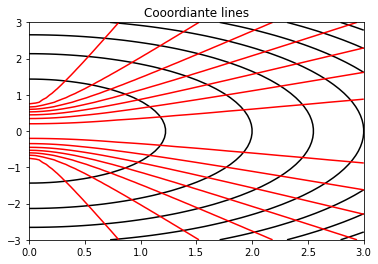

In [11]:
RR,ZZ = np.meshgrid(np.linspace(0,3),np.linspace(-3,3))
plt.contour(RR,ZZ,lmbda_fn(RR,ZZ,0.75),colors='k')
plt.contour(RR,ZZ,mu_fn(RR,ZZ,0.75),colors='r')
plt.title("Cooordiante lines")

Text(0.5, 1.0, 'Potential contours')

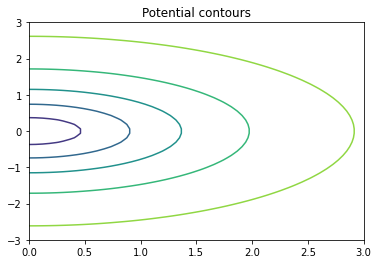

In [12]:
u_of_Rz = sp.asinh(sp.sqrt((lmbda-1))/e)
v_of_Rz = sp.asin(sp.sqrt((1-mu))/e)

Phi_Rz = get_POS_potential(e,u_of_Rz,v_of_Rz)

Phi_Rz_func = sp.lambdify((R,z,e),Phi_Rz)

RR,ZZ = np.meshgrid(np.linspace(0,3),np.linspace(-3,3))
plt.contour(RR,ZZ,Phi_Rz_func(RR,ZZ,0.75))
plt.title("Potential contours")